DATASET IMPORTING

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
#Importing the dataset and naming the columns as required
yacht = pd.read_fwf("yacht_hydrodynamics.data", header= None,
                    names= ["center_of_buoyancy", "prismatic_coefficient", "length_displacement",
                            "beam_draught_ratio", "length_beam_ratio", "froude_number", "resistance"])

In [ ]:
yacht.head()

,center_of_buoyancy,prismatic_coefficient,length_displacement,beam_draught_ratio,length_beam_ratio,froude_number,resistance
0,-2.3,0.568,4.78,3.99,3.17,0.125,0.11
1,-2.3,0.568,4.78,3.99,3.17,0.150,0.27
2,-2.3,0.568,4.78,3.99,3.17,0.175,0.47
3,-2.3,0.568,4.78,3.99,3.17,0.200,0.78
4,-2.3,0.568,4.78,3.99,3.17,0.225,1.18


In [ ]:
yacht.shape

(308, 7)

DATA VISUALISATION

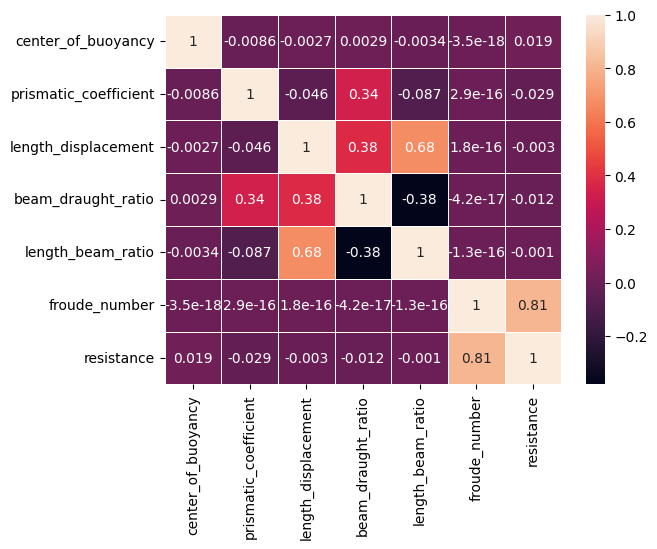

In [ ]:
#Visualizing the dataset columns on a Correlation Matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(yacht.corr(), linewidths=.5, annot= True)
plt.show()

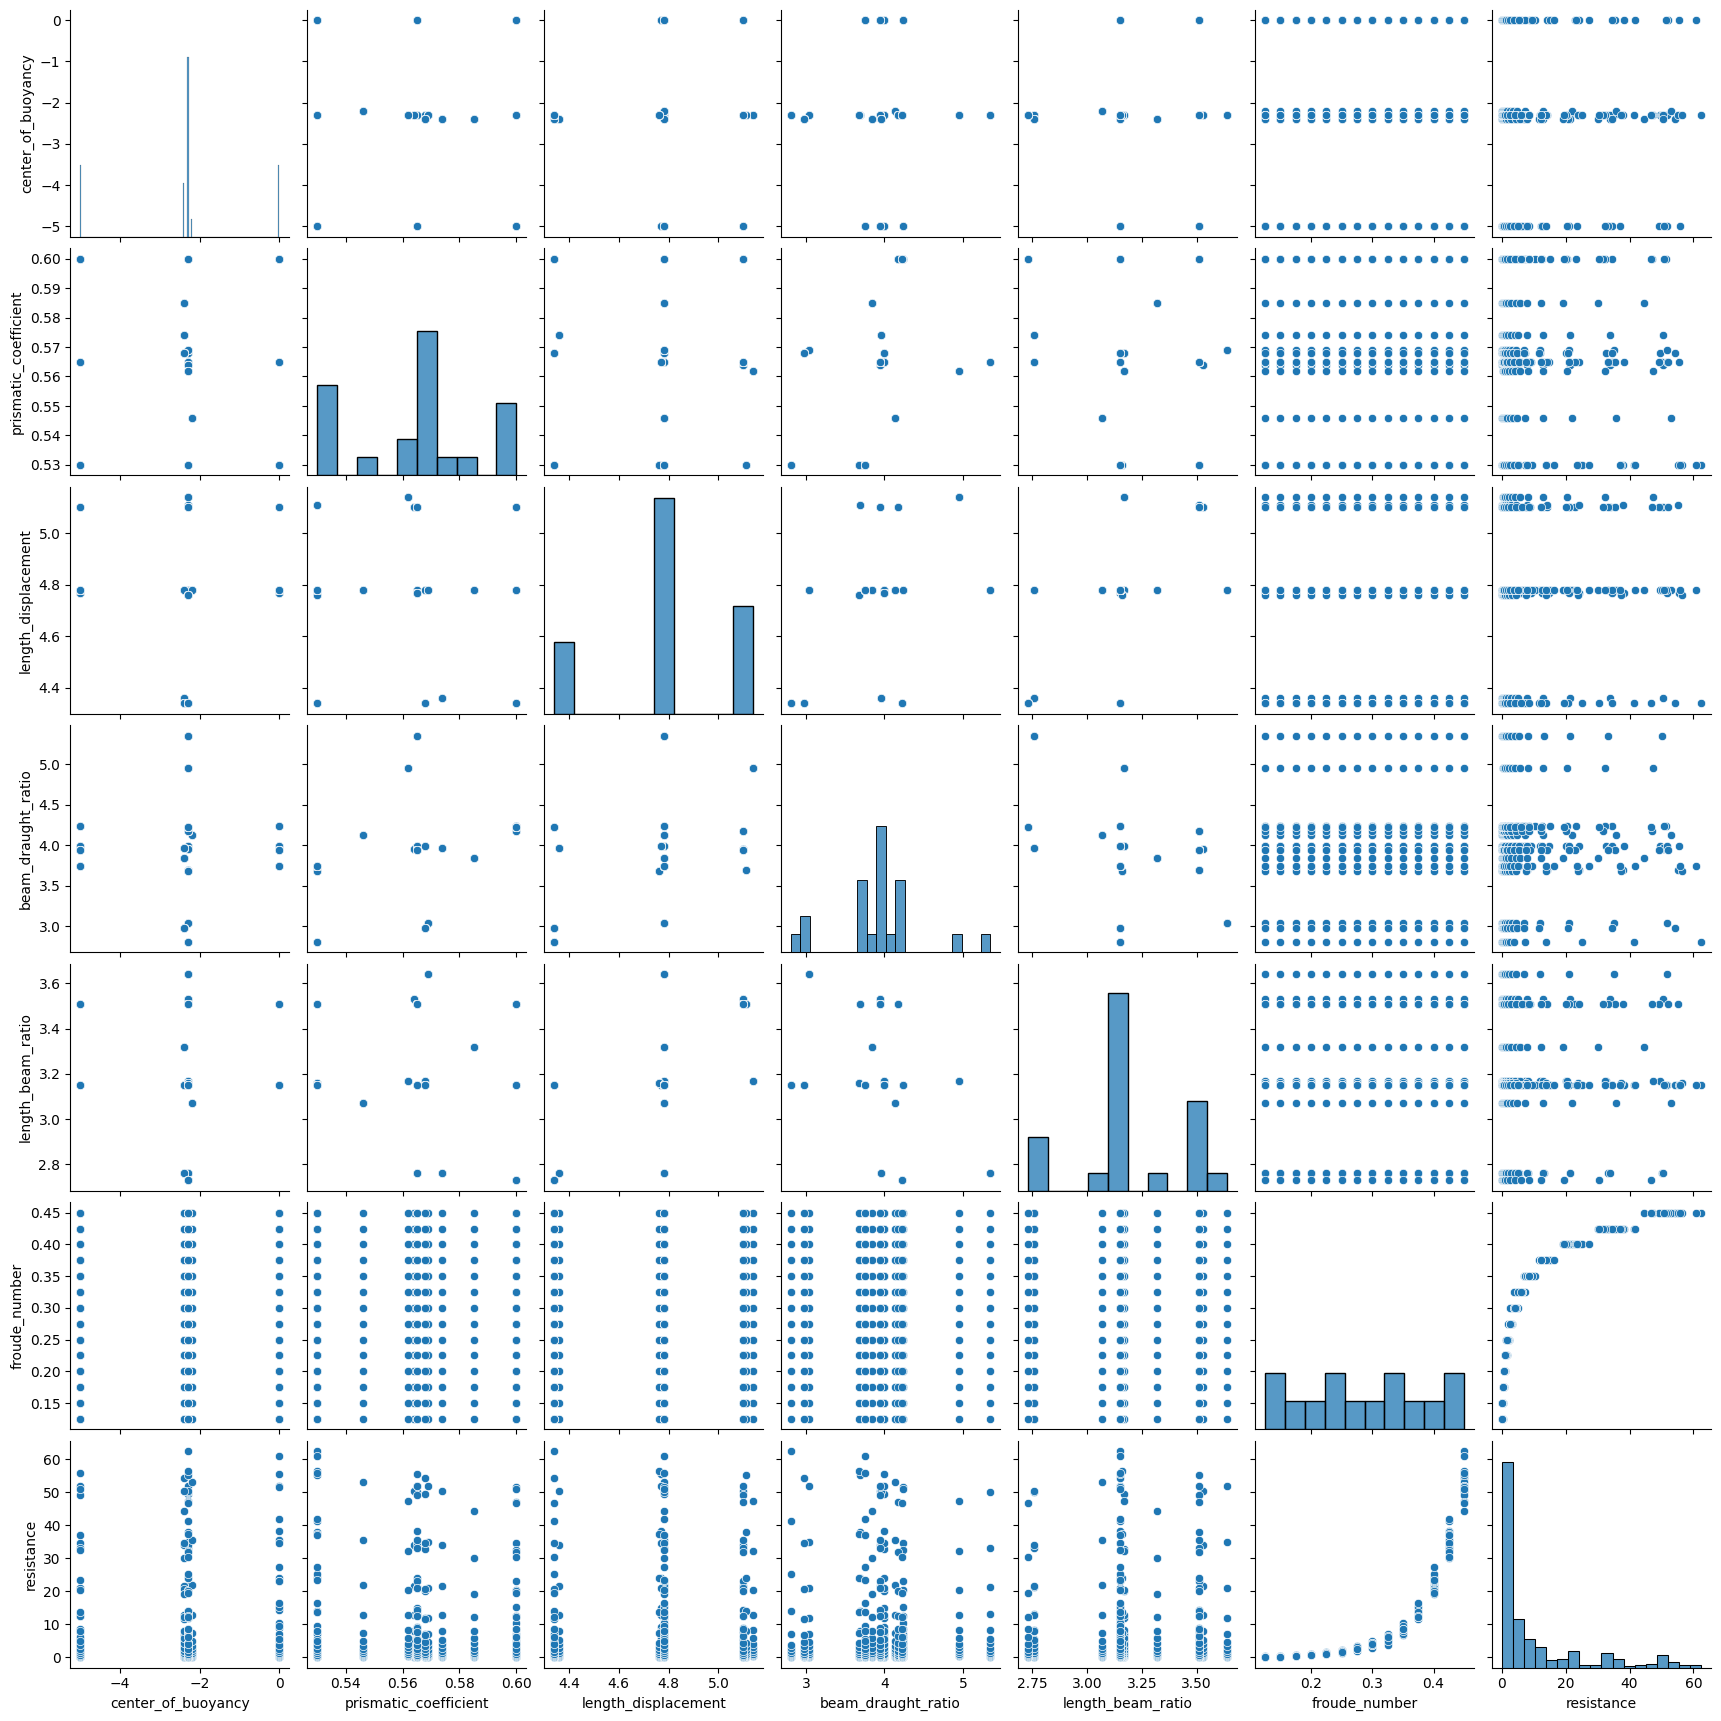

In [ ]:
# seaborn pairplot for all variable couples:
sns.pairplot(yacht)
plt.show()

In [ ]:
yacht.describe()

,center_of_buoyancy,prismatic_coefficient,length_displacement,beam_draught_ratio,length_beam_ratio,froude_number,resistance
count,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000
mean,-2.381818,0.564136,4.788636,3.936818,3.206818,0.287500,10.495357
std,1.513219,0.023290,0.253057,0.548193,0.247998,0.100942,15.160490
min,-5.000000,0.530000,4.340000,2.810000,2.730000,0.125000,0.010000
25%,-2.400000,0.546000,4.770000,3.750000,3.150000,0.200000,0.777500
50%,-2.300000,0.565000,4.780000,3.955000,3.150000,0.287500,3.065000
75%,-2.300000,0.574000,5.100000,4.170000,3.510000,0.375000,12.815000
max,0.000000,0.600000,5.140000,5.350000,3.640000,0.450000,62.420000


DATA CLEANING

In [ ]:
#Checking for Null data in the dataset
yacht_null_data = yacht[yacht.isnull().any(axis=1)]

In [ ]:
yacht_null_data
#Data is OK as there were no missing values or errors

,center_of_buoyancy,prismatic_coefficient,length_displacement,beam_draught_ratio,length_beam_ratio,froude_number,resistance


MODEL BUILDING

In [ ]:
#Defininf X and y
X = yacht.drop(['resistance'], axis=1)
Y = yacht['resistance']

In [ ]:
#Dividing the dataset into trian_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

FEATURE SELECTION

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
# Standardizing the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Feature Selection using SelectKBest with f_regression
selector = SelectKBest(score_func=f_regression, k=4)  # Select top 4 features
X_train_selected = selector.fit_transform(X_train_scaled, Y_train)
X_test_selected = selector.transform(X_test_scaled)

HYPERPARAMETER TUNING

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
# Define the parameter grid
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate Decision Tree Regressor
dt = DecisionTreeRegressor()

# Instantiate GridSearchCV
grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=5, scoring='r2')

# Fit GridSearchCV
grid_search_dt.fit(X_train, Y_train)

# Get the best parameters and best score
best_params_dt = grid_search_dt.best_params_
best_score_dt = grid_search_dt.best_score_

print("Best Parameters for Decision Tree:", best_params_dt)
print("Best Decision Tree Score:", best_score_dt)

# Predict using the best Decision Tree model
dt_best = grid_search_dt.best_estimator_
dt_pred = dt_best.predict(X_test)
accuracy_score_dt_tuned = dt_best.score(X_test, Y_test)
print("Tuned Decision Tree Accuracy Score:", accuracy_score_dt_tuned)


Best Parameters for Decision Tree: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best Decision Tree Score: 0.9936960690752559
Tuned Decision Tree Accuracy Score: 0.9952147036144058


THE MODELS

In [ ]:
#Model 1: Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import average_precision_score, make_scorer, mean_squared_error, explained_variance_score
lr = LinearRegression()
lr = lr.fit(X_train, Y_train)
lr_pred = cross_val_predict(lr, X_test, Y_test, cv=10)
accuracy_score_lr = lr.score(X_test, Y_test)
print(accuracy_score_lr)
explained_var_lr = explained_variance_score(Y_test, lr_pred)

0.5450299966509137


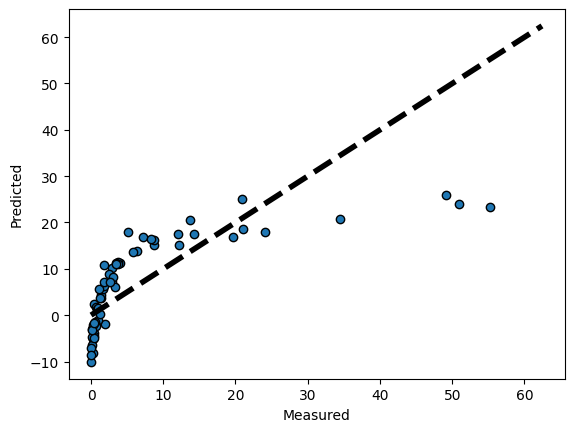

In [ ]:
#Visualizing LR Predicted vs Measured for LR
fig, ax = plt.subplots()
ax.scatter(Y_test, lr_pred, edgecolors=(0, 0, 0))
ax.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [ ]:
#Model 2: SVR
from sklearn.svm import SVR
svr = SVR()
svr = svr.fit(X_train, Y_train)
svr_pred = cross_val_predict(svr, X_test, Y_test, cv=10)
accuracy_score_svr = svr.score(X_test, Y_test)
print(accuracy_score_svr)
explained_var_svr = explained_variance_score(Y_test, svr_pred)

-0.061820740224527215


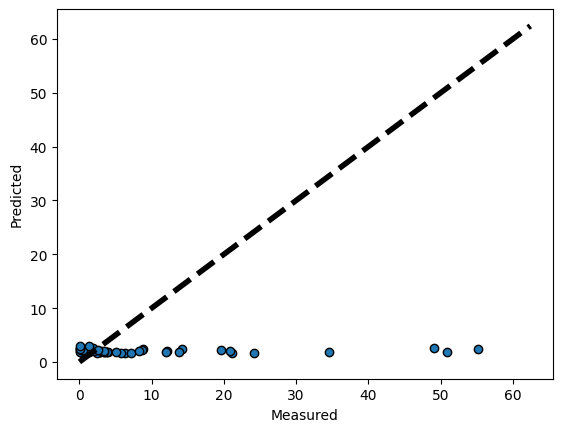

In [ ]:
#Visualizing Predicted vs Measured for SVR
fig, ax = plt.subplots()
ax.scatter(Y_test, svr_pred, edgecolors=(0, 0, 0))
ax.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [ ]:
#Model 3: Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train, Y_train)
dt_pred = dt.predict(X_test)
dt_accuracy = dt.score(X_test, Y_test)
print("Decision Tree Accuracy Score:", dt_accuracy)
explained_var_dt = explained_variance_score(Y_test, dt_pred)

Decision Tree Accuracy Score: 0.9981449232244202


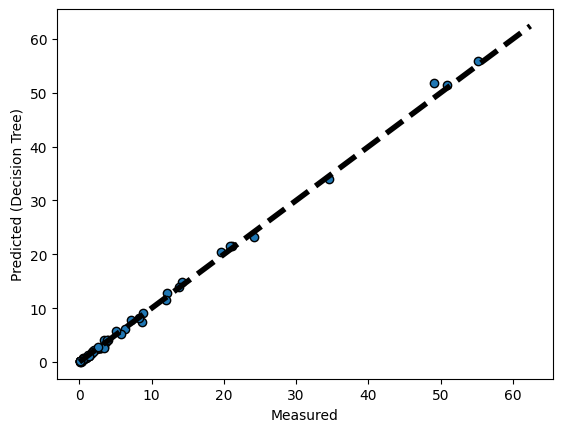

In [ ]:

# Visualize Decision Tree Predicted vs Measured for Decision Tree Regressor
fig, ax = plt.subplots()
ax.scatter(Y_test, dt_pred, edgecolors=(0, 0, 0))
ax.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted (Decision Tree)')
plt.show()

In [ ]:
#Making a table comparing accuracy scores of models
model_names = ['Linear Regression', 'SVR', 'Decision Tree']
accuracy_scores = [accuracy_score_lr, accuracy_score_svr, dt_accuracy]
accuracy_df = pd.DataFrame({'Model': model_names, 'Accuracy Score': accuracy_scores})
print(accuracy_df)

               Model  Accuracy Score
0  Linear Regression        0.545030
1                SVR       -0.061821
2      Decision Tree        0.998145


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from tabulate import tabulate

# Calculate MSE, R2 score for Linear Regression
lr_pred = lr.predict(X_test)
mse_lr = mean_squared_error(Y_test, lr_pred)
r2_lr = r2_score(Y_test, lr_pred)
mse_svr_tuned = mean_squared_error(Y_test, svr_pred)
mse_dt_tuned = mean_squared_error(Y_test, dt_pred)
r2_svr_tuned = r2_score(Y_test, svr_pred)
r2_dt_tuned = r2_score(Y_test, dt_pred)

# Prepare a DataFrame to store the evaluation metrics for all models
metrics_df = pd.DataFrame({
    'Model': ['Linear Regression', 'SVR', 'Decision Tree'],
    'Accuracy Score': [accuracy_score_lr, accuracy_score_svr_tuned , dt_accuracy],
    #No of correct pred/no of pred
    'Mean Squared Error': [mse_lr, mse_svr_tuned, mse_dt_tuned],
    #MSE (obs-pred)^2
    'R2 Score': [r2_lr, r2_svr_tuned, r2_dt_tuned],
    #R2 0-1
    'Explained Variance': [explained_var_lr, explained_var_svr, explained_var_dt]
})
table_str = tabulate(metrics_df, headers='keys', tablefmt='fancy_grid')
# Display the DataFrame with evaluation metrics
print("Evaluation Metrics for All Models:")
print(table_str)

Evaluation Metrics for All Models:
╒════╤═══════════════════╤══════════════════╤══════════════════════╤════════════╤══════════════════════╕
│    │ Model             │   Accuracy Score │   Mean Squared Error │   R2 Score │   Explained Variance │
╞════╪═══════════════════╪══════════════════╪══════════════════════╪════════════╪══════════════════════╡
│  0 │ Linear Regression │         0.54503  │             67.6026  │   0.54503  │          0.526558    │
├────┼───────────────────┼──────────────────┼──────────────────────┼────────────┼──────────────────────┤
│  1 │ SVR               │         0.521969 │            173.449   │  -0.167326 │         -9.10044e-05 │
├────┼───────────────────┼──────────────────┼──────────────────────┼────────────┼──────────────────────┤
│  2 │ Decision Tree     │         0.998145 │              0.27564 │   0.998145 │          0.998169    │
╘════╧═══════════════════╧══════════════════╧══════════════════════╧════════════╧══════════════════════╛
